# Machine Learning - IN221 - February 2025
## Eng. Ahmed Métwalli
## Week 10 - Regularization! Tackling overfitting apart!

# Regularization

## Documentation

In this lab, we are going to use another data (Classification of Covid)

**Covid-19 Classification Data**

Contains a vast number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 different features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

Dataset Source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download

**Attributes** :
 
content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [1]:
import pandas as pd
data = pd.read_csv('Public Datasets/classification_covid.zip',compression='zip')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

- No Actual Missing NaNs, but the missing data holding 97,98,99 as the **documentation said**!!
- This is tricky!

In [2]:
data.sample(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1002218,2,12,1,1,9999-99-99,97,1,33,2,1,...,2,2,1,2,2,2,2,2,7,97
342841,1,6,1,2,21/05/2020,1,1,84,2,1,...,2,1,1,2,2,2,2,2,3,2
586826,1,12,1,1,9999-99-99,97,2,35,2,2,...,2,2,2,2,2,2,2,2,3,97
4666,2,3,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,3,97
48463,1,4,2,2,02/07/2020,1,2,50,97,2,...,2,2,1,2,2,2,2,2,3,2
271045,1,4,1,1,9999-99-99,97,2,50,2,2,...,2,2,2,2,2,2,2,2,7,97
157507,1,4,1,1,9999-99-99,97,2,25,2,2,...,2,2,2,2,2,1,2,2,3,97
612581,2,12,2,1,9999-99-99,97,2,29,97,2,...,2,2,2,2,2,2,2,2,3,97
403084,2,9,1,1,9999-99-99,97,2,45,2,2,...,2,2,2,2,2,2,2,2,3,97
654999,2,12,1,2,9999-99-99,2,1,44,2,1,...,1,2,2,2,2,2,2,2,3,2


**Handling Missing Data**:
- First, counting the proportion of missing data (the ones having 97,98,99 codes)
- Second, look by manual inspection for the date died
- Third, choose which feature to be dropped then.


In [3]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [4]:
for column in data.columns:    
    # Count the occurrences of special codes (97, 98, 99) in these columns
    to_replace = [97, 98, 99,'9999-99-99']
    special_code_counts = {column: data[column].value_counts().loc[lambda x: x.index.isin(to_replace)]\
        .sum() for column in data.columns}
    # Total count for perspective
    total_counts = {column: data[column].count() for column in data.columns}
    # Find total special code
    special_code_proportions = {column: special_code_counts[column] / total_counts[column] for column in data.columns}
special_code_proportions

{'USMER': 0.0,
 'MEDICAL_UNIT': 0.0,
 'SEX': 0.0,
 'PATIENT_TYPE': 0.0,
 'DATE_DIED': 0.9266223207686622,
 'INTUBED': 0.816221061917364,
 'PNEUMONIA': 0.015261664640106812,
 'AGE': 0.0003290179529361276,
 'PREGNANT': 0.5028395679851226,
 'DIABETES': 0.0031833679040602723,
 'COPD': 0.002863886703383163,
 'ASTHMA': 0.002840998497961519,
 'INMSUPR': 0.0032463104689697923,
 'HIPERTENSION': 0.0029602079011992466,
 'OTHER_DISEASE': 0.0048112915146746775,
 'CARDIOVASCULAR': 0.0029335049948739957,
 'OBESITY': 0.0028915432849343156,
 'RENAL_CHRONIC': 0.0028667477290608683,
 'TOBACCO': 0.0030708342274038576,
 'CLASIFFICATION_FINAL': 0.0,
 'ICU': 0.8163765109791861}

- Next the optimum approach is to exclude the features with high missing values.
- To perform this, it is better to do it dynamically (removing based on a filter not by manual inspection)
- For me I have chosen the features with high missing values (More than 0.3) to be dropped (along side with the Y which is the target column) 

In [5]:
dynamic_filtered_features = {k: v for k, v in special_code_proportions.items() if v <= 0.3 and k not in ['CLASIFFICATION_FINAL']}
dynamic_filtered_features

{'USMER': 0.0,
 'MEDICAL_UNIT': 0.0,
 'SEX': 0.0,
 'PATIENT_TYPE': 0.0,
 'PNEUMONIA': 0.015261664640106812,
 'AGE': 0.0003290179529361276,
 'DIABETES': 0.0031833679040602723,
 'COPD': 0.002863886703383163,
 'ASTHMA': 0.002840998497961519,
 'INMSUPR': 0.0032463104689697923,
 'HIPERTENSION': 0.0029602079011992466,
 'OTHER_DISEASE': 0.0048112915146746775,
 'CARDIOVASCULAR': 0.0029335049948739957,
 'OBESITY': 0.0028915432849343156,
 'RENAL_CHRONIC': 0.0028667477290608683,
 'TOBACCO': 0.0030708342274038576}

- The Classification final should be encoded to either 0 or 1 by checking the description you will find that:
    - People with 0 to 3 are diagnosed as covid-19
    - People with 4 or more are not

In [6]:
data['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [7]:
# Mapping them into Positive and Negative.
data['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'].map({1: 'POS', 2: 'POS', 3: 'POS', 4:'NEG', 5:'NEG', 6:'NEG', 7:'NEG'})

In [8]:
data['CLASIFFICATION_FINAL'] # It became a binary classification problem

0          POS
1          NEG
2          POS
3          NEG
4          POS
          ... 
1048570    NEG
1048571    NEG
1048572    NEG
1048573    NEG
1048574    NEG
Name: CLASIFFICATION_FINAL, Length: 1048575, dtype: object

In [9]:
data.shape[0]

1048575

- Before dropping data I had 1048575 record

In [10]:
# Update feature selection based on the analysis above
updated_features = list(dynamic_filtered_features.keys())
mask = data[updated_features] # Select only the updated features from the dataset
mask['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'] # Add the target column back
for column in mask.columns:
    if column != 'CLASIFFICATION_FINAL':
        mask = mask[(mask[column]<96)] # Excluding the 97,98,99 missing data from data
mask.shape

C:\Users\Metwalli\AppData\Local\Temp\ipykernel_32508\3399123075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['CLASIFFICATION_FINAL'] = data['CLASIFFICATION_FINAL'] # Add the target column back


(1024460, 17)

### Data Modelling

In [11]:
from sklearn.model_selection import train_test_split
# Update feature selection based on the analysis above
X_updated = mask.drop('CLASIFFICATION_FINAL',axis=1)
Y = mask['CLASIFFICATION_FINAL']
# Split the updated dataset into training and testing sets
X_train_updated, X_test_updated, Y_train, Y_test = train_test_split(X_updated, Y, test_size=0.2, random_state=42)

#### Normalization using Z-score & Split Data

In [12]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_updated = scaler.fit_transform(X_train_updated)

# Apply the same transformation to the test data
X_test_updated = scaler.transform(X_test_updated)

#### Cross Validation (KEEP THIS STEP ASIDE FOR A WHILE)

In [13]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold, cross_val_score
# # Initialize the logistic regression model
# model_updated = LogisticRegression(n_jobs=-1)

# # Define K-Fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Perform K-Fold CV to evaluate model
# scores = cross_val_score(model_updated, X_train_updated, Y_train, cv=kf, scoring='accuracy')
# print(f'Cross-Validation Accuracy Scores: {scores}')
# print(f'Mean CV Accuracy: {scores.mean()}')


# Data Preprocessing: Regularization

- Regularization is a technique used in machine learning and statistics to prevent overfitting by penalizing large coefficients in a model. 
- Overfitting occurs when a model learns noise with data that negatively impacts the performance of the model on new data.
- Regularization techniques add a penalty on the size of the coefficients to the loss function. 
- Common types of regularization include L1 regularization (Lasso), L2 regularization (Ridge), and Elastic Net (Hybrid)

## Mathematical Background

Regularization is is achieved by adding a penalty term to the loss function, which discourages overly complex models by penalizing large coefficients. The general form of a regularized loss function is:

$$ \text{Loss}_{\text{regularized}} = \text{Loss}_{\text{original}} + \lambda \times \text{Penalty} $$

Here, $\text{Loss}_{\text{original}}$ represents the original loss function, such as Mean Squared Error (MSE) for regression tasks. The parameter $\lambda \geq 0$ is known as the regularization strength; higher values of $\lambda$ apply a stronger penalty, thus encouraging simpler models. The $\text{Penalty}$ term is responsible for imposing costs on the size of coefficients, and its form varies depending on the type of regularization applied.

### L1 Regularization (Lasso)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), imposes a penalty equal to the absolute value of the magnitude of coefficients. This can be mathematically represented as:

$$ \text{Penalty}_{L1} = \sum_{i=1}^{n} |w_i| $$

where $w_i$ are the model coefficients. L1 regularization tends to produce sparse models, where a subset of coefficients can become exactly zero. This property makes Lasso regularization particularly useful for feature selection in models with high-dimensional data.

### L2 Regularization (Ridge)

L2 regularization, known as Ridge regression, applies a penalty equal to the square of the magnitude of coefficients:

$$ \text{Penalty}_{L2} = \sum_{i=1}^{n} w_i^2 $$

This form of regularization tends to distribute the penalty among all coefficients, pushing them closer to zero but rarely to zero. Unlike L1 regularization, L2 does not naturally result in feature selection but is effective in handling multicollinearity (when independent variables are highly correlated) by distributing the coefficient values across similar features.

### Key Differences between L1 and L2 Regularization

The core difference between L1 and L2 regularization lies in their penalty terms and the resulting impact on the model coefficients:

- **Sparsity**: L1 can zero out coefficients entirely, making it great for automatic feature selection; L2 (Ridge) shrinks all coefficients toward zero but rarely eliminates them, so it keeps every feature in the model.
- **Path and Geometry**: The L1 penalty creates a piecewise‑linear solution path, which “jumps” coefficients to zero once λ is large enough. The L2 penalty yields a smooth, continuous path where coefficients decay gradually.
- **Robustness and Stability**: L1’s absolute penalty is less sensitive to outliers, often yielding more robust models when data contain anomalies. L2’s squared penalty gives more numerically stable solutions, especially helpful when predictors are highly correlated.

### Elastic Net

Elastic Net is a hybrid regularization technique that combines the penalties of L1 and L2 regularization:

$$ \text{Penalty}_{\text{ElasticNet}} = \rho \sum_{i=1}^{n} |w_i| + (1 - \rho) \sum_{i=1}^{n} w_i^2 $$

Here, $\rho$ is the mixing parameter that controls the balance between L1 and L2 regularization penalties. Elastic Net is particularly useful when there are multiple features correlated with each other. It combines the feature selection capability of L1 with the regularization strength of L2, making it a versatile choice for various modeling scenarios.

## Selecting the Regularization Strength $\lambda$

To ensure a fair comparison between Lasso, Ridge, and Elastic Net, we construct a unified grid of $\lambda$ values:

1. **Compute the maximum $\lambda$:**

   $$
   \lambda_{\max}
   = \frac{1}{n}\,\max_{j} \bigl|\,X_{\!\cdot j}^\top y\bigr|
   $$

   ```python
   n = X_train_updated.shape[0]
   lambda_max = np.abs(X_train_updated.T.dot(y)).max() / n
   print("lambda_max:", lambda_max)



In [16]:
# WHY REQUIRES NORMALIZATION????????
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

# 1. Prepare y
y_reg = Y_train.map({'NEG': 0, 'POS': 1}).values

# 2. Scale X so all features have mean=0, std=1
scaler    = StandardScaler()
X_scaled  = scaler.fit_transform(X_train_updated)

# 3. Compute lambda_max on the scaled data
n = X_scaled.shape[0]
lambda_max = np.abs(X_scaled.T.dot(y_reg)).max() / n
print("lambda_max:", lambda_max)

# 4. Build a wide grid of 100 points! to encourage sparsity
#    – from lambda_max*10 down to lambda_max*0.1
lambdas = np.logspace(
    np.log10(lambda_max * 10),
    np.log10(lambda_max * 0.1),
    100
)

def APPLY_REGULARIZATION(reg, X, y):
    reg.fit(X, y)
    name = reg.__class__.__name__

    if hasattr(reg, 'l1_ratio_'):
        print(f"Best l1_ratio (ρ) using {name}: {reg.l1_ratio_:.2f}")
    print(f"Best λ using {name}: {reg.alpha_:.6e}")
    print(f"Train R² using {name}: {reg.score(X, y):.4f}")

    coef = pd.Series(reg.coef_, index=X_updated.columns)
    print(f"{name} kept {(coef!=0).sum()} features, dropped {(coef==0).sum()}")
    print(coef.sort_values(), "\n")

# 5. Run pure ElasticNetCV (tuning λ & ρ) on scaled X
APPLY_REGULARIZATION(
    ElasticNetCV(
        alphas=lambdas,
        l1_ratio=[0.9],
        cv=5,
        max_iter=5000 # 1000
    ),
    X_scaled, y_reg
)

# 6. Run pure LassoCV on scaled X
APPLY_REGULARIZATION(
    LassoCV(
        alphas=lambdas,
        cv=5,
        max_iter=5000
    ),
    X_scaled, y_reg
)

APPLY_REGULARIZATION(
    RidgeCV(
        alphas=lambdas,
        cv=5),X_scaled, y_reg)



lambda_max: 0.09317532780099191
Best l1_ratio (ρ) using ElasticNetCV: 0.90
Best λ using ElasticNetCV: 9.317533e-03
Train R² using ElasticNetCV: 0.0565
ElasticNetCV kept 12 features, dropped 4
PNEUMONIA        -0.046410
OBESITY          -0.016818
MEDICAL_UNIT     -0.006223
DIABETES         -0.002833
USMER             0.000000
ASTHMA            0.000000
HIPERTENSION     -0.000000
CARDIOVASCULAR    0.000000
RENAL_CHRONIC     0.000152
COPD              0.001363
OTHER_DISEASE     0.001719
INMSUPR           0.003104
TOBACCO           0.005029
SEX               0.010120
AGE               0.037831
PATIENT_TYPE      0.038190
dtype: float64 

Best λ using LassoCV: 9.317533e-03
Train R² using LassoCV: 0.0559
LassoCV kept 11 features, dropped 5
PNEUMONIA        -0.045997
OBESITY          -0.015925
MEDICAL_UNIT     -0.005343
DIABETES         -0.002212
USMER             0.000000
ASTHMA            0.000000
HIPERTENSION     -0.000000
CARDIOVASCULAR    0.000000
RENAL_CHRONIC     0.000000
COPD          

# BONUS? Apply Regularization/CV within the classifier

## Logistic Loss with Regularization

The penalized logistic loss you’re minimizing is

$$
L(w)
= -\frac{1}{n}\sum_{i=1}^n \Bigl[y_i\log p_i \;+\;(1-y_i)\log(1-p_i)\Bigr]
\;+\;\lambda\,P(w),
$$

- P(w) is penalty!

In scikit-learn, you supply instead the inverse regularization strength \(C\), with  

$$
\lambda = \frac{1}{C},
$$

so that **smaller** \(C\) ⇒ **larger** \(\lambda\) (stronger regularization), and vice versa.  


In [17]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegressionCV
from sklearn.metrics       import accuracy_score, roc_auc_score

# 1. Prepare y
y_cls = Y_train.map({'NEG': 0, 'POS': 1}).values

# 2. Scale X once
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X_train_updated)

# 3. Build a C-grid that goes *much* smaller → stronger penalty
#    C = 1/λ, so lower C means higher λ
#    Here we span from λ_max*1e2 → λ_max*1e-4  ⇒  C from 1e-4/λ_max → 1e2/λ_max
n          = X_scaled.shape[0]
lambda_max = np.abs(X_scaled.T.dot(y_cls)).max() / n

# allow C down!!
Cs = np.logspace(
    np.log10(1e-6 / lambda_max),
    np.log10(1e-5 / lambda_max),
    30
)


# 4. Fit LogisticRegressionCV with a heavy L1-mix
logcv = LogisticRegressionCV(
    Cs         = Cs, # default from e-4 to e4
    penalty    = 'elasticnet',
    solver     = 'saga',
    l1_ratios  = [0.9],  # include pure Lasso
    cv         = 3,
    scoring    = 'neg_log_loss', # or accuracy (classification metrics)
    max_iter   = 1000,
    n_jobs     = -1,
    refit      = True
)
logcv.fit(X_scaled, y_cls)

# 5. Eval & inspect sparsity
preds   = logcv.predict(X_scaled)
#probs   = logcv.predict_proba(X_scaled)[:,1]
acc     = accuracy_score(y_cls, preds)
#roc_auc = roc_auc_score(y_cls, probs) # KEEP THIS FOR NOW WE SPEACK ABOUT LATER

print(f"Best l1_ratio (ρ):   {logcv.l1_ratio_[0]:.2f}")
print(f"Best C (1/λ):        {logcv.C_[0]:.6e}")
print(f"Train accuracy:      {acc:.4f}")
#rint(f"Train ROC AUC:       {roc_auc:.4f}") # KEEP THIS NOW WE SPEAK ABOUT IT LATER

coefs = pd.Series(logcv.coef_.ravel(), index=X_updated.columns)
print(f"Kept { (coefs!=0).sum() } features, dropped { (coefs==0).sum() }")
print(coefs.sort_values())


Best l1_ratio (ρ):   0.90
Best C (1/λ):        1.073245e-04
Train accuracy:      0.6562
Kept 9 features, dropped 7
PNEUMONIA        -0.186132
OBESITY          -0.065278
MEDICAL_UNIT     -0.020056
DIABETES         -0.006809
USMER             0.000000
COPD              0.000000
ASTHMA            0.000000
HIPERTENSION      0.000000
OTHER_DISEASE     0.000000
CARDIOVASCULAR    0.000000
RENAL_CHRONIC     0.000000
INMSUPR           0.005356
TOBACCO           0.012963
SEX               0.036278
PATIENT_TYPE      0.155701
AGE               0.160195
dtype: float64


- Perfect after tweaking Cs several times and adding stronger penalties, we reduced the amount of features (7 features are dropped)

- IMPORTANT NOTE: Train accuracy 0.6562 (vs. 0.6599 before)
You lose only about 0.003 pp of accuracy by pruning almost half your features—often a worthwhile trade-off for interpretability and simpler models.

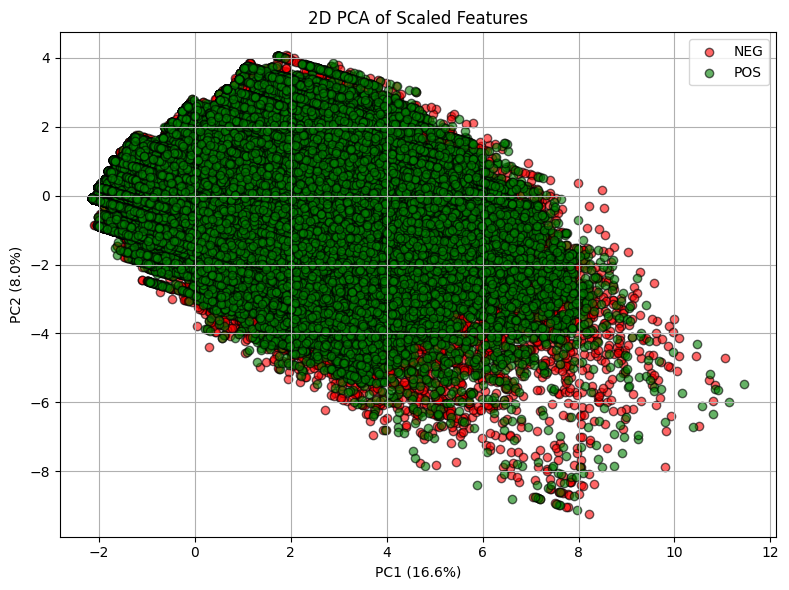

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 6. Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 7. Plot 2D PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[y_cls == 0, 0], X_pca[y_cls == 0, 1],
    alpha=0.6, label='NEG', c='red', edgecolor='k'
)
plt.scatter(
    X_pca[y_cls == 1, 0], X_pca[y_cls == 1, 1],
    alpha=0.6, label='POS', c='green', edgecolor='k'
)

plt.title('2D PCA of Scaled Features')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- High Dimensional data:
    - Not linearly seperable
    - Let's use Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# 1. Apply PCA to reduce dimensionality (retain 16 components)
pca = PCA(n_components=X_scaled.shape[1])
X_pca_full = pca.fit_transform(X_scaled)

# 2. Train Random Forest on PCA-reduced data
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_pca_full, y_cls)

# 3. Predict and evaluate
y_pred_rf = rf.predict(X_pca_full)
acc_rf = accuracy_score(y_cls, y_pred_rf)

print(f"Random Forest (after PCA) Accuracy: {acc_rf:.4f}")
print(classification_report(y_cls, y_pred_rf, target_names=['NEG', 'POS']))


Random Forest (after PCA) Accuracy: 0.7051
              precision    recall  f1-score   support

         NEG       0.70      0.92      0.80    508589
         POS       0.74      0.35      0.47    310979

    accuracy                           0.71    819568
   macro avg       0.72      0.64      0.63    819568
weighted avg       0.71      0.71      0.67    819568



In [27]:
# 1. Apply PCA to reduce dimensionality (retain 16 components)
pca = PCA(n_components=2) # Reduce only to 2 components
X_pca_full = pca.fit_transform(X_scaled)

# 2. Train Random Forest on PCA-reduced data
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_pca_full, y_cls)

# 3. Predict and evaluate
y_pred_rf = rf.predict(X_pca_full)
acc_rf = accuracy_score(y_cls, y_pred_rf)

print(f"Random Forest (after PCA) Accuracy: {acc_rf:.4f}")
print(classification_report(y_cls, y_pred_rf, target_names=['NEG', 'POS']))


Random Forest (after PCA) Accuracy: 0.7051
              precision    recall  f1-score   support

         NEG       0.70      0.92      0.80    508589
         POS       0.74      0.35      0.47    310979

    accuracy                           0.71    819568
   macro avg       0.72      0.64      0.63    819568
weighted avg       0.71      0.71      0.67    819568



## Decision Tree Split Criterion

A decision tree splits data at each node to maximize class separation using an **impurity measure** (e.g., Gini or entropy). The goal is to minimize the **impurity** after a split.

### Gini Impurity (default in scikit-learn):

$$
G(t) = 1 - \sum_{k=1}^{K} p_{k}^{2}
$$

- \( p_k \) is the proportion of samples belonging to class \(k\) at node \(t\).

The optimal split is the one that **maximizes the reduction in impurity**:

$$
\Delta G = G(t) - \left(\frac{n_L}{n} G(t_L) + \frac{n_R}{n} G(t_R)\right)
$$

- \(n_L, n_R\) are the sizes of the left and right child nodes.

In practice, decision trees can **overfit**, so you regularize them with parameters like:
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`


<div style="display: flex; gap: 2px;">

  <div style="text-align: left;">
    <h3>Random Forest Algorithm</h3>
    <img src="RF.png" width="450">
  </div>

</div>


## Support Vector Machine with Regularization

SVM aims to find a hyperplane that **maximally separates** classes by maximizing the margin between support vectors:

$$
\min_{w, b} \quad \frac{1}{2} \|w\|^2 \quad \text{subject to} \quad y_i(w^T x_i + b) \geq 1
$$

To allow some misclassification (soft margin), we introduce slack variables \(\xi_i\) and a regularization term \(C\):

$$
\min_{w, b, \xi} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i \quad \text{subject to} \quad y_i(w^T x_i + b) \geq 1 - \xi_i
$$

- \(C\) is the regularization parameter — larger \(C\) means **less regularization** (try to fit all data).
- Smaller \(C\) allows **more margin violations** (more regularization).

### In scikit-learn:
```python
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf')  # RBF is default kernel
```


## K-Nearest Neighbors (KNN)

KNN is a **non-parametric**, **instance-based** method that classifies a point based on the **majority vote** of its \(k\) closest neighbors.

Given a new point \(x\), find the \(k\) nearest training samples using a distance metric (usually Euclidean):

$$
\text{distance}(x, x_i) = \|x - x_i\|_2
$$

Then, classify \(x\) by majority class among those \(k\) neighbors:

$$
\hat{y} = \text{mode}(\{y_{i_1}, y_{i_2}, \dots, y_{i_k}\})
$$

- Smaller \(k\) → more flexible (lower bias, higher variance)
- Larger \(k\) → smoother boundary (higher bias, lower variance)

### In scikit-learn:
```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
```


## Comparison of Classification Algorithms

| Aspect                      | Logistic Regression       | Decision Tree           | Random Forest                  | Support Vector Machine (SVM) | K-Nearest Neighbors (KNN)     |
|----------------------------|---------------------------|--------------------------|-------------------------------|------------------------------|-------------------------------|
| **Type**                   | Linear model              | Tree-based model         | Ensemble of decision trees     | Margin-based classifier      | Instance-based (lazy learner) |
| **Model Complexity**       | Low                       | Medium                   | High                           | High                         | Low–Medium                    |
| **Interpretability**       | High                      | High                     | Medium–Low                     | Low                          | Medium                        |
| **Overfitting Tendency**   | Low (with regularization) | High                     | Low                            | Medium–Low                   | High (for low \(k\))          |
| **Training Speed**         | Fast                      | Fast                     | Slower (many trees)            | Medium–Slow                  | Very Fast (no training phase) |
| **Prediction Speed**       | Fast                      | Fast                     | Fast (after training)          | Medium                       | Slow (needs distance calc)    |
| **Scalability**            | Good                      | Good                     | Medium                         | Poor (kernel computation)    | Poor                          |
| **Regularization**         | Yes (\(L1, L2\))          | Via pruning/hyperparams  | Tree-level + ensemble effect   | Yes (\(C\))                  | Via \(k\), distance metric     |
| **Sensitivity to Features**| Medium                    | Low                      | Low                            | High                         | High                          |
| **Use Cases**              | Linearly separable data   | Rule-based systems       | High-accuracy general models   | Complex boundaries            | Small datasets, few features  |
